# Data  Understanding

In [34]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 

from my_functions import evaluate_model

from sklearn.metrics import classification_report, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [35]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('Data/telecom_churn.csv')

In [36]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [37]:
# Print the first five rows of the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
# Print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [39]:
# Print the shape of the dataframe
print("Shape:", df.shape)

Shape: (3333, 21)


In [40]:
# Get the summary statistics for dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [41]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [42]:
# Show unique values in our target column ('churn')
print("Unique Churn Values:")
print(df['churn'].unique())

Unique Churn Values:
[False  True]


In [43]:
# Display the count of each class in the 'churn' column
print("Churn Class Distribution:")
print(df['churn'].value_counts())


Churn Class Distribution:
False    2850
True      483
Name: churn, dtype: int64


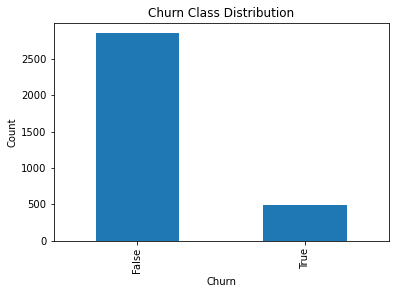

In [44]:
# Visualize the class distribution in the 'churn' column
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar')
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [45]:
# Check the unique values in categorical columns
print("Unique values in categorical columns:")
categorical_cols = ['state', 'international plan', 'voice mail plan']
for col in categorical_cols:
    print(col, ":", df[col].unique())

Unique values in categorical columns:
state : ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
international plan : ['no' 'yes']
voice mail plan : ['yes' 'no']


**The dataset contains 3333 rows and 21 columns.**

**The columns represent various features such as state, account length, area code, phone number, international plan, voice mail plan, and numerical variables related to call durations, charges, and customer service calls.**

**The data types of the columns include bool, int64, float64, and object.**

**There are no missing values in any of the columns, as indicated by the count of missing values being 0 for each column.**

**The 'state' column has unique values representing different states.
The 'international plan' and 'voice mail plan' columns have unique values of 'yes' and 'no' indicating the presence or absence of the respective plans.**

**The churn class distribution shows that the dataset has a class imbalance, with a higher number of customers not churning compared to those who churned.**

The dataset provides an opportunity for further analysis, such as understanding the factors influencing churn, predicting churn based on customer behavior, or identifying patterns in customer usage.

Data Cleaning

In [46]:
# Drop unnecessary columns
df = df.drop(columns=["phone number"], axis=1)

# Encode binary categorical variables
df["international plan"] = df["international plan"].map({"yes": 1, "no": 0})
df["voice mail plan"] = df["voice mail plan"].map({"yes": 1, "no": 0})

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encoding the "churn" column
df['churn'] = label_encoder.fit_transform(df['churn'])


Data Exploration

In [47]:
# Create a dataframe with only the numeric columns
numeric_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge',
                'customer service calls']
numeric_df = df[numeric_cols]


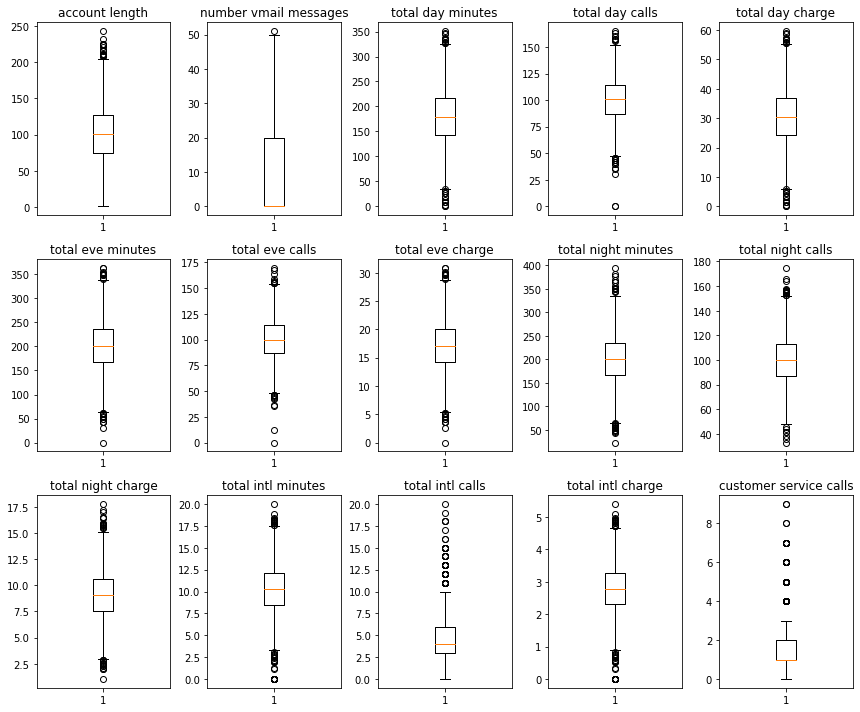

In [48]:
# Create boxplots to check for outliers
plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i+1)
    plt.boxplot(data=numeric_df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


>> **Findings:**

* From the boxplots, all numerical features have outliers, some very significant like in the 'total int calls' column and some not very significant like 'total night' column. 

* The presence of outliers in this dataset may have been attributed to extreme customer behavior. 

##### 
Now let's explore at the distribution of the numeric features.

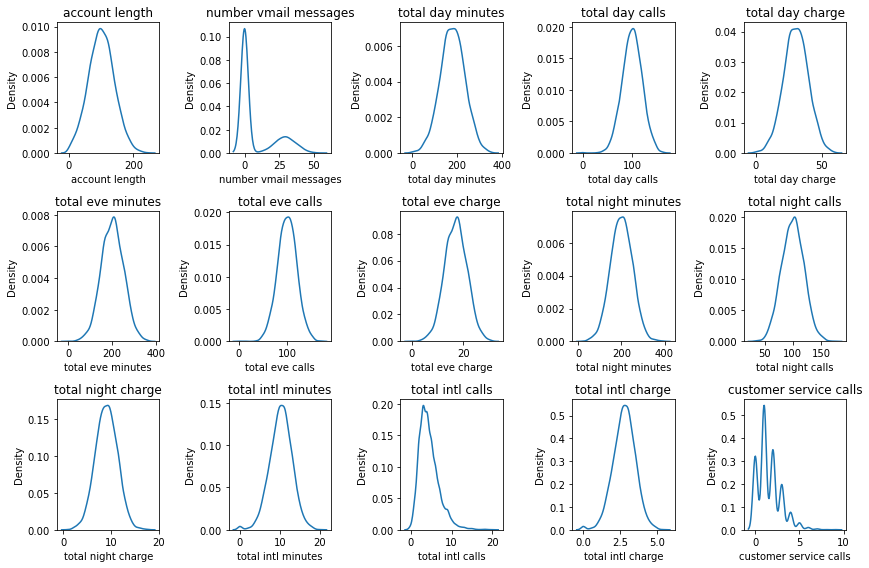

In [49]:
# Create KDE plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(data=numeric_df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

>> ### **Findings**: 

* Account Length: The distribution is relatively uniform.

* Number of Voicemail Messages: Skewed right, with a peak at zero.

* Total Day Minutes: Approximately normal distribution with a slight right skew. Peak around 200 minutes.

* Total Day Calls: Roughly symmetric, with a peak around 100 calls.

* Total Day Charge: Distribution follows the shape of Total Day Minutes. Approximately normal with a slight right skew.

* Total Eve Minutes: Similar distribution to Total Day Minutes. Slightly skewed right, peak around 200 minutes.

* Total Eve Calls: Approximately symmetric distribution. Peak around 100 calls, even spread of values.

* Total Eve Charge: Distribution follows Total Eve Minutes, approximately normal with a slight right skew.

* Total Night Minutes: Approximately normal distribution, slightly skewed right, peak around 200 minutes.

* Total Night Calls: Approximately symmetric distribution, Peak around 100 calls, even spread of values.

* Total Night Charge: Distribution follows Total Night Minutes, Approximately normal with a slight right skew.

* Total Intl Minutes: Right-skewed distribution. Majority of customers have lower number of international minutes. Peak around 10 minutes for shorter international calls.

* Total Intl Calls: Approximately symmetric distribution with a peak around 3-4 calls, even spread of values.

* Total Intl Charge: Distribution follows Total Intl Minutes.

* Customer Service Calls: Right-skewed distribution, with a peak at zero indicating a significant portion of customers don't make any service calls.

In [50]:
correlation_matrix = numeric_df.corr()

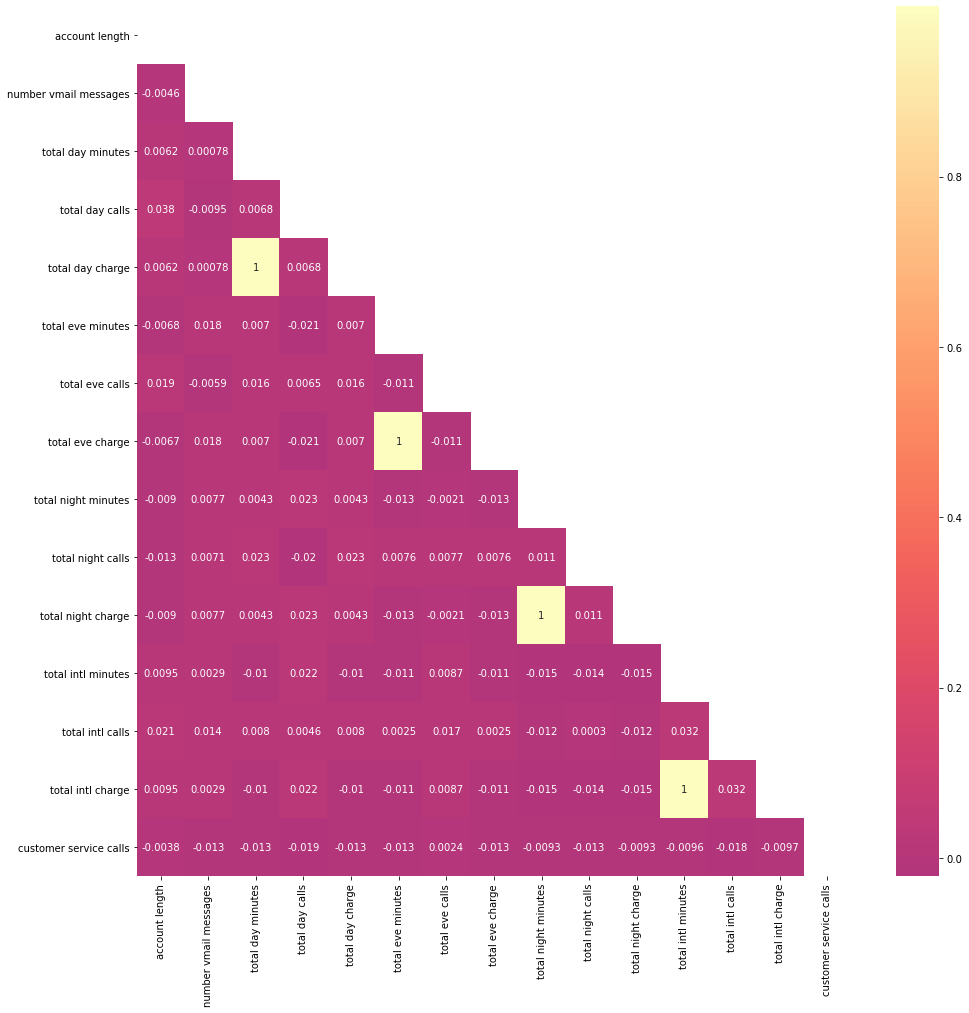

In [51]:
# Create a fig size
plt.figure(figsize=(16, 16))

# Create a mask to show only the lower triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)

mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with the lower triangle mask applied
sns.heatmap(correlation_matrix, mask=mask, cmap='magma', center=0, annot=True)

# Show the plot
plt.show();

Categorical Feature Analysis

1. Voice mail Plan

In [52]:
from my_functions import plot_categorical_churn

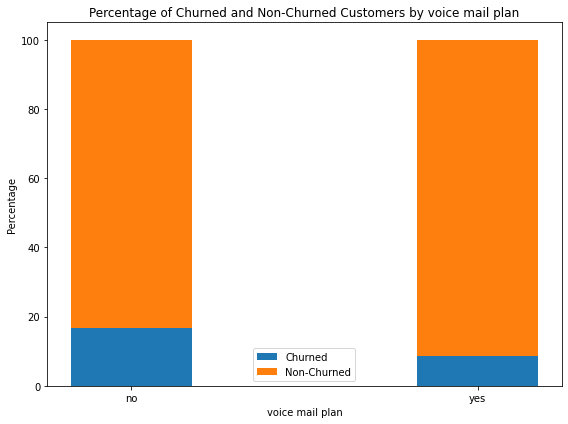

In [53]:
plot_categorical_churn('voice mail plan')

2. International Plan

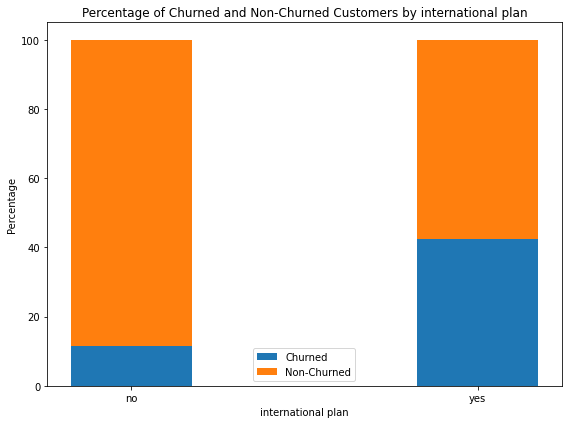

In [54]:
plot_categorical_churn('international plan')

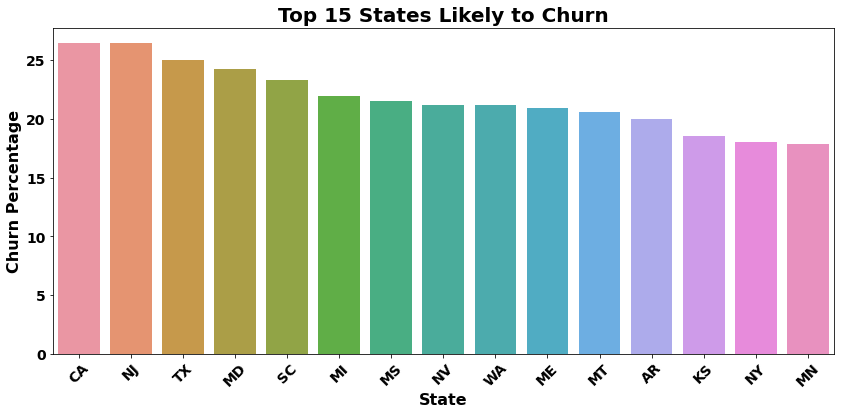

In [55]:
# Calculate churn percentage by state
state_churn_percentage = df.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 15 states
top_states = state_churn_percentage.sort_values(ascending=False).head(15)

# Plot the bar chart using Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.ylabel('Churn Percentage', fontsize=16, fontweight='bold')
plt.title('Top 15 States Likely to Churn', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()



In [62]:
df['day minutes service calls interaction'] = df['total day minutes'] * df['customer service calls']
df['eve night minutes interaction'] = df['total eve minutes'] * df['total night minutes']
#df['day calls service calls interaction'] = df['total day calls'] * df['customer service calls']
#df['avg_cost_per_minute_day'] = df['total day charge'] / df['total day minutes']

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day minutes service calls interaction,eve night minutes interaction,day calls service calls interaction
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,265.1,48303.78,110
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,161.6,49735.20,123
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,0.0,19707.12,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,598.8,12188.11,142
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,500.1,27717.27,339


In [57]:
df['day calls service calls interaction'].describe()

count    3333.000000
mean      156.466547
std       137.741628
min         0.000000
25%        76.000000
50%       120.000000
75%       226.000000
max      1080.000000
Name: day calls service calls interaction, dtype: float64

In [63]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'day minutes service calls interaction',
       'eve night minutes interaction', 'day calls service calls interaction'],
      dtype='object')

In [64]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['churn', 'state'], axis=1)
y = df['churn']

Feature selection

In [65]:
X.isnull().sum()

account length                           0
area code                                0
international plan                       0
voice mail plan                          0
number vmail messages                    0
total day minutes                        0
total day calls                          0
total day charge                         0
total eve minutes                        0
total eve calls                          0
total eve charge                         0
total night minutes                      0
total night calls                        0
total night charge                       0
total intl minutes                       0
total intl calls                         0
total intl charge                        0
customer service calls                   0
day minutes service calls interaction    0
eve night minutes interaction            0
day calls service calls interaction      0
dtype: int64

In [66]:
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit(random_state=42)

result.summary()

Optimization terminated successfully.
         Current function value: 0.290721
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3311
Method:                           MLE   Df Model:                           21
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.2974
Time:                        20:28:10   Log-Likelihood:                -968.97
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                4.390e-160
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -11.5774      1.520     -7.618      0.000     -14.556      -8.599
account length                            0.0017      0.001      1.187      0.235      -0.001       0.005
area code                                -0.0005      0.001     -0.380      0.704      -0.003       0.002
international plan                        2.1158      0.156     13.551      0.000       1.810       2.422
voice mail plan                          -2.1080      0.600     -3.513      0.000      -3.284      -0.932
number vmail messages                     0.0367      0.019      1.942      0.052      -0.000       0.074
total day minutes                        -1.4954      3.455     -0.433      0.665      -8.267       5.277
total day calls                          -0.0024      0.005     -0.474      0.636      -0.012       0.007
total day charge                          9.0116     20.325      0.443      0.657     -30.825      48.848
total eve minutes                         1.3067      1.737      0.752      0.452      -2.098       4.711
total eve calls                           0.0009      0.003      0.324      0.746      -0.005       0.007
total eve charge                        -15.3732     20.434     -0.752      0.452     -55.424      24.677
total night minutes                      -0.0149      0.926     -0.016      0.987      -1.829       1.800
total night calls                         0.0020      0.003      0.680      0.497      -0.004       0.008
total night charge                        0.2211     20.571      0.011      0.991     -40.097      40.540
total intl minutes                       -5.3992      5.612     -0.962      0.336     -16.398       5.600
total intl calls                         -0.0920      0.026     -3.479      0.001      -0.144      -0.040
total intl charge                        20.3558     20.785      0.979      0.327     -20.382      61.094
customer service calls                    2.3421      0.247      9.470      0.000       1.857       2.827
day minutes service calls interaction    -0.0111      0.001    -13.237      0.000      -0.013      -0.009
eve night minutes interaction          4.268e-05   2.47e-05      1.729      0.084   -5.69e-06    9.11e-05
day calls service calls interaction       0.0035      0.002      1.714      0.087      -0.000       0.007
=========================================================================================================
"""

International Plan: This feature has a significant positive coefficient, indicating that customers with an international plan are more likely to churn.

Voice Mail Plan: This feature has a significant negative coefficient, suggesting that customers with a voice mail plan are less likely to churn.

Number of Voice Mail Messages: This feature has a marginally significant positive coefficient, implying that a higher number of voice mail messages may slightly increase the likelihood of churn.

Customer Service Calls: This feature has a significant positive coefficient, indicating that as the number of customer service calls increases, the likelihood of churn also increases.

These results indicate that the selected features have a significant impact on predicting churn.

In [68]:
# Select the desired features
selected_features = ['international plan', 'voice mail plan', 'number vmail messages', 'customer service calls']
X_selected = X[selected_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Apply SMOTE to handle class imbalance on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply StandardScaler for feature scaling on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply feature scaling and constant term to the test set
X_test_scaled = scaler.transform(X_test)

##### Baseline Model

1. Logistic Regression Model

In [70]:
# Create a logistic regression model
baseline_model = LogisticRegression(random_state=42)
# Train the model
baseline_model.fit(X_train_scaled, y_train_resampled)


LogisticRegression(random_state=42)

In [71]:

# Make predictions on the test set
y_pred_1 = baseline_model.predict(X_test_scaled)

2. Decision Tree Classifier

In [72]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42) 
tree_clf.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [73]:
# Make predictions on the test data
y_pred_2 = tree_clf.predict(X_test_scaled)

3. Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [75]:
# Make predictions on the test data
y_pred_3 = rf_model.predict(X_test_scaled)

### Evaluation metrics

1. Regression model

Accuracy: 0.8260869565217391
Precision: 0.453416149068323
Recall: 0.7227722772277227
F1-score: 0.5572519083969465


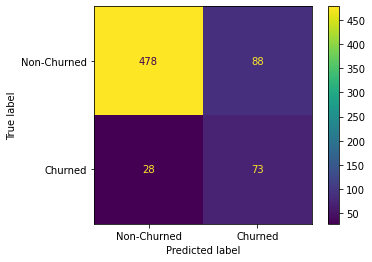

In [76]:
evaluate_model(y_test, y_pred_1)

2. Decision Tree

Accuracy: 0.8425787106446777
Precision: 0.4861111111111111
Recall: 0.693069306930693
F1-score: 0.5714285714285714


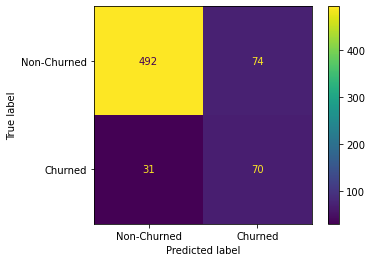

In [77]:
evaluate_model(y_test, y_pred_2)


3. Random Forest

Accuracy: 0.9250374812593704
Precision: 0.7628865979381443
Recall: 0.7326732673267327
F1-score: 0.7474747474747475


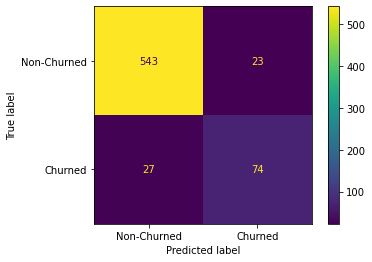

In [78]:
evaluate_model(y_test, y_pred_3)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def perform_cross_validation(X, y, model_type='decision_tree', n_estimators=100, max_depth=None, cv=5):
    """
    Perform cross-validation using the specified classifier and calculate the mean accuracy scores.

    Args:
    - X: The feature matrix.
    - y: The target variable.
    - model_type: The type of model to use ('decision_tree', 'random_forest', or 'logistic_regression').
    - n_estimators: The number of trees in the Random Forest (default: 100).
    - max_depth: The maximum depth of each tree (default: None).
    - cv: The number of cross-validation folds (default: 5).

    Returns:
    - The mean cross-validated accuracy score.
    """

    if model_type == 'decision_tree':
        # Create the Decision Tree classifier
        clf = DecisionTreeClassifier(max_depth=max_depth)
    elif model_type == 'random_forest':
        # Create the Random Forest classifier
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif model_type == 'logistic_regression':
        # Create the Logistic Regression classifier
        clf = LogisticRegression()
    else:
        raise ValueError("Invalid model_type. Supported types are 'decision_tree', 'random_forest', and 'logistic_regression'.")

    # Perform cross-validation
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

    # Calculate the mean accuracy score
    mean_accuracy = scores.mean()

    return mean_accuracy




In [ ]:
baseline_cv = perform_cross_validation(X_train_scaled, y_train_resampled, model_type='decision_tree')
baseline_cv

In [80]:
cv_dt = perform_cross_validation(X_train_scaled, y_train_resampled, model_type='decision_tree')
cv_dt

0.8640622565855225

In [81]:
cv_rf = perform_cross_validation(X_train_scaled, y_train_resampled, model_type='random_forest', n_estimators=100, max_depth=None)
cv_rf

0.925140146821621

Hyperparameter tuning

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10]
}

# Create the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='recall')
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)



Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.8726045145686975


In [83]:
# Create a new decision tree model with the best hyperparameters
dt_model_best = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fit the model to the training data
dt_model_best.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred_4 = dt_model_best.predict(X_test_scaled)

# Calculate evaluation metrics
evaluate_model(y_test, y_pred_4)

Accuracy: 0.8440779610194903
Precision: 0.4897959183673469
Recall: 0.7128712871287128
F1-score: 0.5806451612903226


In [84]:
grid_search_cv = perform_cross_validation(X_train_scaled, y_train_resampled, model_type='random_forest', n_estimators=100, max_depth=None)
grid_search_cv

0.9255768249045516

Accuracy: 0.8170914542728636
Precision: 0.4378698224852071
Recall: 0.7326732673267327
F1-score: 0.5481481481481482


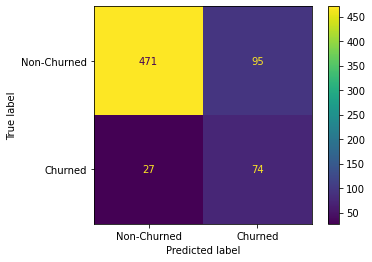

In [86]:
# Create a logistic regression model with the best hyperparameters
tuned_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

# Train the model
tuned_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_4 = tuned_model.predict(X_test_scaled)

# Calculate evaluation metrics
evaluate_model(y_test, y_pred_4)



In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Fit the model on the training data
gb_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred_5 = gb_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model(y_test, y_pred_5)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9280359820089955
Precision: 0.7431192660550459
Recall: 0.801980198019802
F1-score: 0.7714285714285715


In [94]:
# Create a new Gradient Boosting model with the best hyperparameters
optimized_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=42)

# Fit the model to the training data
optimized_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = optimized_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8605697151424287
Precision: 0.5294117647058824
Recall: 0.7128712871287128
F1-score: 0.6075949367088607


In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [98]:
gbt_clf.fit(X_train_scaled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [99]:
# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train_scaled)
gbt_clf_test_preds = gbt_clf.predict(X_test_scaled)

In [100]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       566
           1       0.74      0.80      0.77       101

    accuracy                           0.93       667
   macro avg       0.85      0.88      0.86       667
weighted avg       0.93      0.93      0.93       667

